<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/mlAssignment2_retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [29]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [30]:
train_df.head()

,tappingsteelgrade,force_meas,speed,entrytemperature,entrytemperaturebot,entrytemperaturecore,entrytemperaturetop,entrythickness,entrywidth,exitthickness,...,pctni,pcto,pctp,pcts,pctsi,pctsn,pctti,pctv,pctzr,fur_line_no
0,GL4G71R1,58204143.19,2.634871,1000.661121,939.942163,1034.327117,916.847574,0.080232,3.496171,0.065490,...,0.004,0.0000,0.0153,0.0068,0.135,0.001,0.0097,0.0005,0.000,3
1,GL4G71R1,53211949.94,3.947747,1020.846126,991.621746,1044.907925,975.227384,0.039173,3.974567,0.031835,...,0.004,0.0000,0.0119,0.0051,0.128,0.001,0.0090,0.0005,0.000,4
2,JV7P1BP6,43513598.87,1.573130,829.078290,786.696648,857.833946,763.533963,0.148507,1.912962,0.136898,...,0.663,0.0025,0.0088,0.0011,0.119,0.001,0.0121,0.0027,0.001,2
3,JT5P31P2,33293124.30,2.979649,736.655045,734.483511,738.987016,730.511453,0.014806,2.715973,0.013670,...,0.019,0.0017,0.0150,0.0031,0.283,0.002,0.0128,0.0019,0.001,2
4,JT5P32P1,68174217.63,3.401038,893.722030,867.859688,913.164933,850.840106,0.048040,3.654979,0.039451,...,0.010,0.0019,0.0138,0.0040,0.208,0.002,0.0135,0.0011,0.001,3


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tappingsteelgrade     64000 non-null  object 
 1   force_meas            64000 non-null  float64
 2   speed                 64000 non-null  float64
 3   entrytemperature      64000 non-null  float64
 4   entrytemperaturebot   64000 non-null  float64
 5   entrytemperaturecore  64000 non-null  float64
 6   entrytemperaturetop   64000 non-null  float64
 7   entrythickness        64000 non-null  float64
 8   entrywidth            64000 non-null  float64
 9   exitthickness         64000 non-null  float64
 10  zeropoint             64000 non-null  float64
 11  radius                64000 non-null  float64
 12  pctal                 64000 non-null  float64
 13  pctb                  64000 non-null  float64
 14  pctc                  64000 non-null  float64
 15  pctca              

In [32]:
train_df.describe()

,force_meas,speed,entrytemperature,entrytemperaturebot,entrytemperaturecore,entrytemperaturetop,entrythickness,entrywidth,exitthickness,zeropoint,...,pctni,pcto,pctp,pcts,pctsi,pctsn,pctti,pctv,pctzr,fur_line_no
count,6.400000e+04,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,...,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.003375e+07,3.779013,886.128457,867.350675,900.417283,854.123855,0.040993,3.276235,0.035087,-0.000676,...,0.014337,0.001374,0.011533,0.003637,0.210649,0.001715,0.011563,0.001352,0.000967,2.506109
std,1.352541e+07,0.946752,70.285265,65.489190,75.752388,63.090396,0.026703,0.598162,0.023439,0.000429,...,0.026608,0.000943,0.002619,0.001885,0.050472,0.001007,0.001931,0.000790,0.000585,1.117914
min,6.422410e+06,0.110275,667.656567,666.136213,669.374160,663.286545,0.006731,1.701090,0.006210,-0.003000,...,0.001000,0.000000,0.005700,0.000300,0.102000,0.000000,0.005000,0.000100,0.000000,1.000000
25%,3.989866e+07,2.999237,835.308614,818.885421,846.675440,808.692638,0.022340,2.821224,0.019753,-0.001000,...,0.005000,0.000000,0.009600,0.001800,0.176000,0.001000,0.010300,0.000900,0.001000,2.000000
50%,4.828004e+07,3.703474,878.197080,861.819321,894.146274,849.963406,0.032873,3.242649,0.028171,-0.000700,...,0.007000,0.001600,0.011500,0.003900,0.201000,0.002000,0.011500,0.001200,0.001000,3.000000
75%,5.981500e+07,4.485569,931.771724,913.160300,946.694511,898.660484,0.051543,3.721578,0.042670,-0.000350,...,0.010000,0.002100,0.013500,0.005000,0.254000,0.002000,0.012800,0.001400,0.001000,4.000000
max,8.911219e+07,6.907368,1151.730368,1086.236252,1205.025167,1068.429079,0.199652,4.749123,0.177142,0.001000,...,0.666000,0.003000,0.024800,0.009200,0.326000,0.006000,0.017500,0.005400,0.004000,4.000000


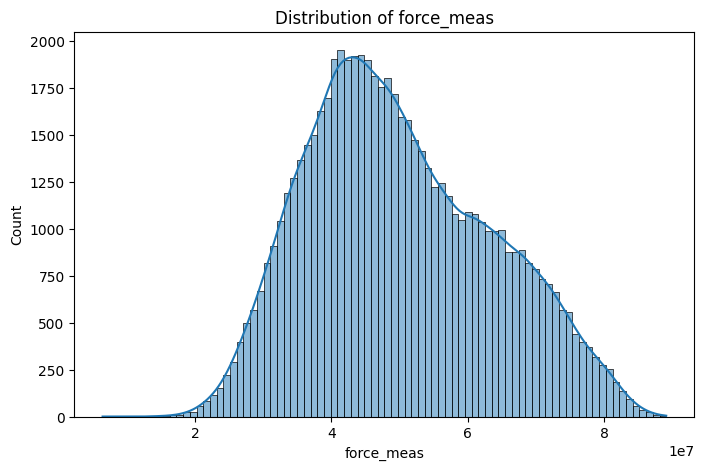

Minimum and maximum of force_meas: 6422410.07 89112193.83


In [33]:
# Plot the distribution of the target variable force_meas
plt.figure(figsize=(8, 5))
sns.histplot(train_df['force_meas'], kde=True)
plt.title('Distribution of force_meas')
plt.xlabel('force_meas')
plt.show()

# Check the range of force_meas values; if the values are large, consider scaling (e.g., dividing by 10000)
print("Minimum and maximum of force_meas:", train_df['force_meas'].min(), train_df['force_meas'].max())





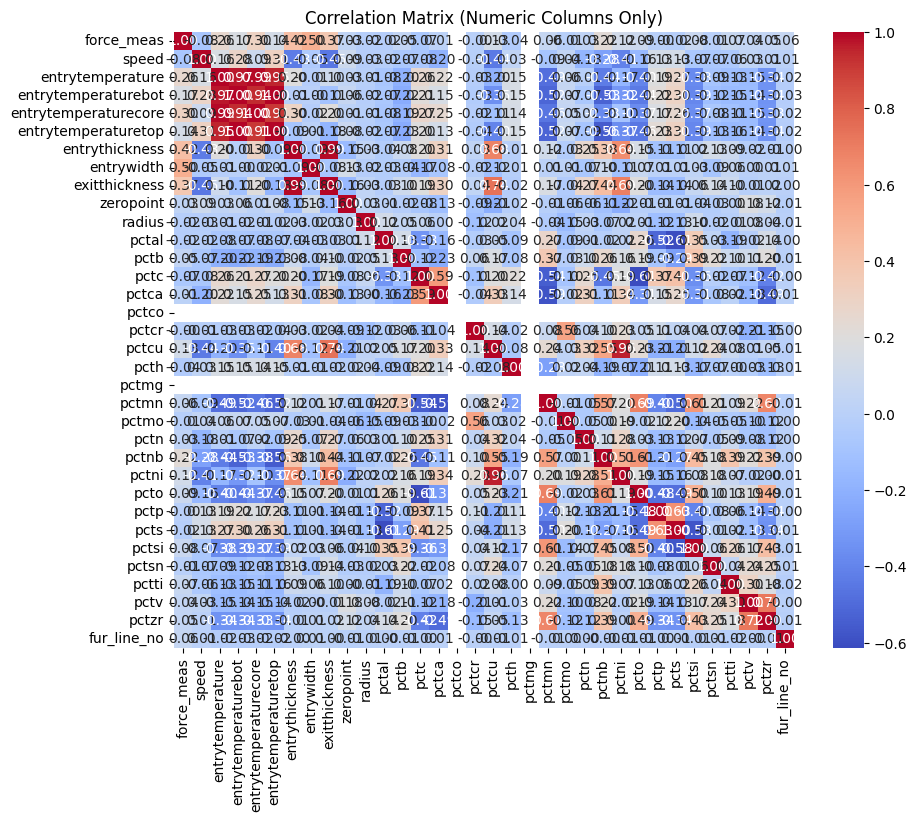

In [34]:
# Select all numeric columns from the training DataFrame
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()



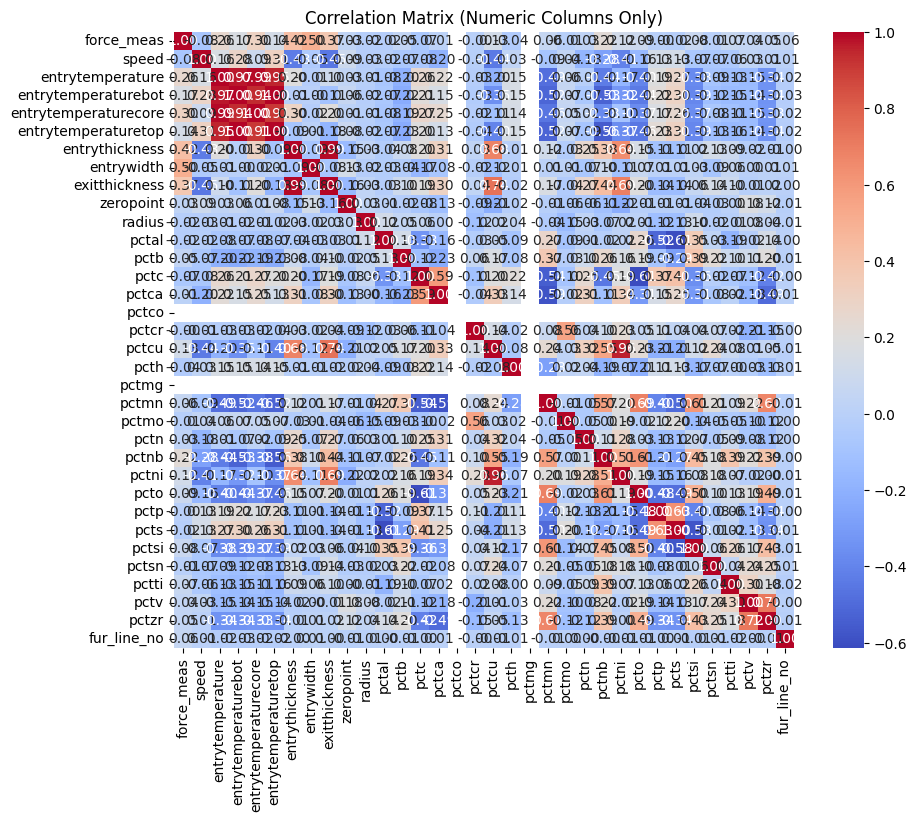


Number of missing values per column:
tappingsteelgrade       0
force_meas              0
speed                   0
entrytemperature        0
entrytemperaturebot     0
entrytemperaturecore    0
entrytemperaturetop     0
entrythickness          0
entrywidth              0
exitthickness           0
zeropoint               0
radius                  0
pctal                   0
pctb                    0
pctc                    0
pctca                   0
pctco                   0
pctcr                   0
pctcu                   0
pcth                    0
pctmg                   0
pctmn                   0
pctmo                   0
pctn                    0
pctnb                   0
pctni                   0
pcto                    0
pctp                    0
pcts                    0
pctsi                   0
pctsn                   0
pctti                   0
pctv                    0
pctzr                   0
fur_line_no             0
dtype: int64


In [35]:
# Select all numeric columns for correlation calculation
numeric_df = train_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

# Check the number of missing values in each column
print("\nNumber of missing values per column:")
print(train_df.isnull().sum())



In [36]:
# Step 1: Select features and target variable
# From the training data, select only numeric features and drop the target variable 'force_meas'
X = train_df.select_dtypes(include=[np.number]).drop(columns=['force_meas'])
y = train_df['force_meas'] / 10000  # Scale the target variable

# Display
print("Shape of X:", X.shape)
print("Description of y:")
print(y.describe())

# Step 2: Feature Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of the standardized features and display the first 5 rows
print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled:")
print(X_scaled[:5])

# Apply the same processing to the test set, keeping only the features used in training
X_test = test_df.select_dtypes(include=[np.number])
# Select only the feature columns that were used in training (i.e., the columns in X)
X_test = X_test[X.columns]
X_test_scaled = scaler.transform(X_test)

print("Shape of test set X_test_scaled:", X_test_scaled.shape)


Shape of X: (64000, 33)
Description of y:
count    64000.000000
mean      5003.374669
std       1352.540820
min        642.241007
25%       3989.865909
50%       4828.003535
75%       5981.500129
max       8911.219383
Name: force_meas, dtype: float64
Shape of X_scaled: (64000, 33)
First 5 rows of X_scaled:
[[-1.20850089e+00  1.62955293e+00  1.10845858e+00  1.76774467e+00
   9.94195846e-01  1.46945502e+00  3.67688850e-01  1.29712105e+00
  -2.87615939e-01  1.71820834e+00 -8.44419107e-01 -1.95625464e+00
   1.27155016e+00  2.70135712e-01  0.00000000e+00 -5.03154244e-01
  -4.02691354e-01  3.55943097e-01  0.00000000e+00 -2.04975855e+00
  -8.97415370e-01 -8.22165014e-01 -1.19848532e+00 -3.88496414e-01
  -1.45744129e+00  1.43831684e+00  1.67807224e+00 -1.49884912e+00
  -7.10231470e-01 -9.64868769e-01 -1.07867137e+00 -1.65212260e+00
   4.41799983e-01]
 [ 1.78225074e-01  1.91674204e+00  1.89759625e+00  1.90742200e+00
   1.91953900e+00 -6.81351499e-02  1.16747200e+00 -1.38752454e-01
  -1.21896680

In [37]:
# Define the regression models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross-validation to compute the negative mean squared error for each model, then calculate RMSE
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    model_scores[name] = rmse_scores.mean()
    print(f"{name} RMSE: {rmse_scores.mean():.4f}")



Linear Regression RMSE: 728.3350
Decision Tree RMSE: 774.8096
Random Forest RMSE: 515.9985
Gradient Boosting RMSE: 757.2200


In [38]:
# Define a simplified parameter grid for Random Forest

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Initialize GridSearchCV to perform hyperparameter tuning on Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_scaled, y)

# Output the best parameters and the corresponding cross-validation RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))



Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE: 521.7245403483738


In [39]:
# Use the best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# If the target variable was scaled (previously y = force_meas / 10000), convert predictions back to the original scale
test_df['force_meas_pred'] = y_test_pred * 10000

# If the test set contains the true values for force_meas, calculate evaluation metrics
if 'force_meas' in test_df.columns:
    rmse_test = np.sqrt(mean_squared_error(test_df['force_meas'], test_df['force_meas_pred']))
    r2_test = r2_score(test_df['force_meas'], test_df['force_meas_pred'])
    print("Test RMSE:", rmse_test)
    print("Test R2:", r2_test)

# If the test set contains baseline predictions in 'force_pre', compare them
if 'force_pre' in test_df.columns:
    if 'force_meas' in test_df.columns:
        rmse_baseline = np.sqrt(mean_squared_error(test_df['force_meas'], test_df['force_pre']))
        print("Baseline RMSE:", rmse_baseline)
    else:
        print("Baseline predictions available for comparison.")



Test RMSE: 4918222.8334146375
Test R2: 0.8656715427077286
Baseline RMSE: 3775600.3207218386


                 feature  importance
6             entrywidth    0.316075
5         entrythickness    0.298876
7          exitthickness    0.075650
0                  speed    0.062921
3   entrytemperaturecore    0.025296
4    entrytemperaturetop    0.020071
22                 pctnb    0.018496
8              zeropoint    0.016670
9                 radius    0.015601
2    entrytemperaturebot    0.014759
27                 pctsi    0.014650
25                  pctp    0.010749
12                  pctc    0.010722
1       entrytemperature    0.009516
10                 pctal    0.009516
19                 pctmn    0.008211
26                  pcts    0.007765
29                 pctti    0.007610
21                  pctn    0.006540
15                 pctcr    0.006034
30                  pctv    0.005908
32           fur_line_no    0.005614
23                 pctni    0.005105
13                 pctca    0.004957
24                  pcto    0.004777
16                 pctcu    0.004770
1

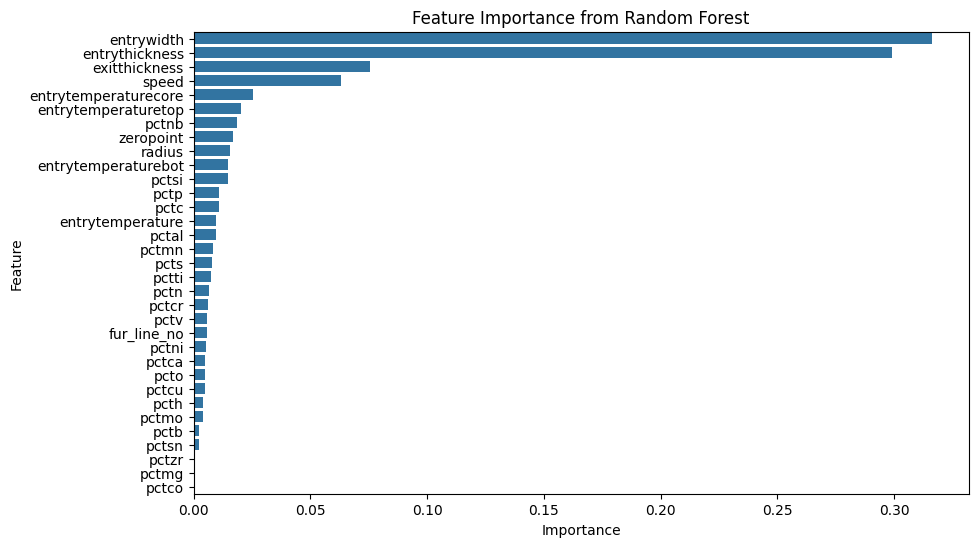

In [40]:
# Extract feature importances from the best model
importances = best_model.feature_importances_
feature_names = X.columns  # Ensure consistency with the features used during training

# Create a DataFrame and sort it in descending order by importance
feat_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feat_importance_df)

# Plot a bar chart to visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


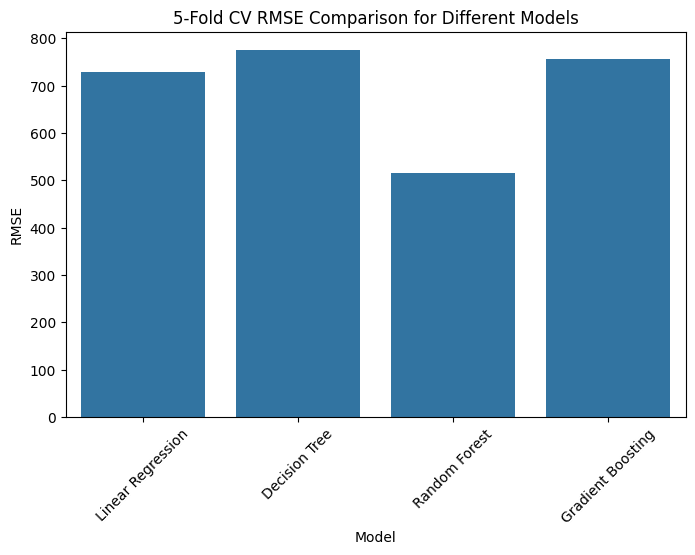

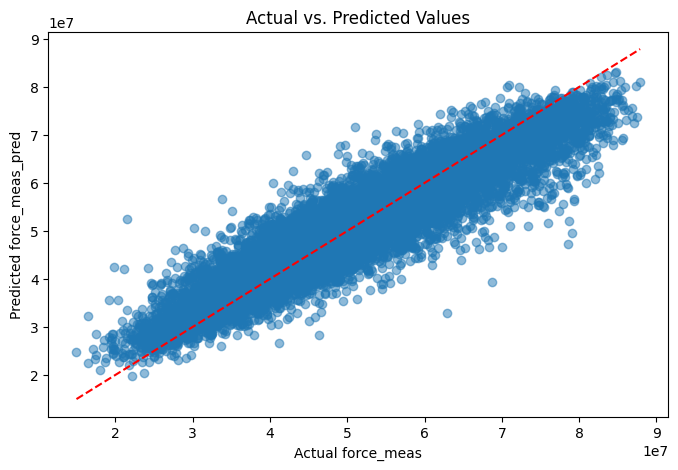

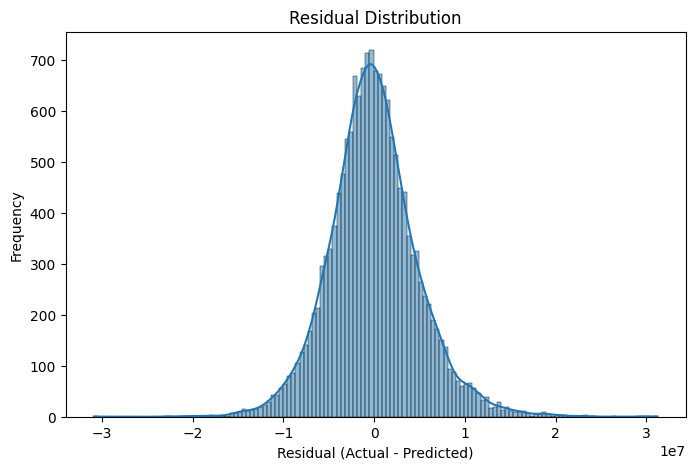

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Model performance comparison plot (bar chart)
model_names = list(model_scores.keys())
rmse_values = list(model_scores.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=rmse_values)
plt.title('5-Fold CV RMSE Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# 2. Scatter plot of predicted vs. actual values (if the test set has the true force_meas values)
if 'force_meas' in test_df.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(test_df['force_meas'], test_df['force_meas_pred'], alpha=0.5)
    plt.xlabel('Actual force_meas')
    plt.ylabel('Predicted force_meas_pred')
    plt.title('Actual vs. Predicted Values')
    # Add a y = x reference line
    lims = [min(test_df['force_meas'].min(), test_df['force_meas_pred'].min()),
            max(test_df['force_meas'].max(), test_df['force_meas_pred'].max())]
    plt.plot(lims, lims, 'r--')
    plt.show()

    # Plot the distribution of residuals (residual = actual - predicted)
    residuals = test_df['force_meas'] - test_df['force_meas_pred']
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True)
    plt.title('Residual Distribution')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.show()


In [42]:
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
import joblib
# 挂载Google Drive
drive.mount('/content/drive')

# 保存模型到Google Drive
joblib.dump(best_model, '/content/drive/My Drive/random_forest_model.joblib')

ValueError: mount failed

Regression Task Report
1. Introduction
The objective of this assignment is to develop a regression model to predict the measured force (force_meas) using various features provided in the dataset. In addition, a baseline prediction (force_pre) is given, which serves as a reference for evaluating the performance of the new model. Our approach involves exploratory data analysis (EDA), data preprocessing, training multiple regression models, hyperparameter tuning using 5-fold cross-validation, and analyzing feature importance. The final goal is to improve upon the baseline prediction.

2. Dataset Description
The dataset contains the following key elements:

force_meas: The ground truth force value measured by on-site instruments. Due to its large magnitude (ranging approximately from 6.42×10^6 to 8.91×10^7), the target variable was scaled by dividing by 10,000 for model training.
Other Features: Various numerical features such as entrywidth, entrythickness, speed, etc., that are used as inputs for the regression models.
force_pre (in test.csv): The baseline prediction generated by another algorithm, used for comparative evaluation.
3. Exploratory Data Analysis (EDA)
Our initial analysis involved the following steps:

Distribution of force_meas: We plotted the histogram and KDE of force_meas to understand its distribution. The range confirmed that scaling was necessary.
Correlation Analysis: A correlation matrix was computed and visualized using a heatmap for all numeric features. This helped identify relationships among features.
Missing Value Check: A check for missing values in the dataset revealed no missing entries, which simplified further preprocessing.
4. Methodology
Data Preprocessing
Feature Selection:
We selected all numerical features from the training data and dropped the target variable force_meas from the feature set. The target variable was scaled by dividing by 10,000.

Feature Standardization:
The numerical features were standardized using StandardScaler to improve model performance.

Test Set Preparation:
The test set was preprocessed in the same way as the training set, ensuring consistency by selecting only the features used during training.

Model Training and Evaluation
Four regression models were considered:

Linear Regression
Decision Tree Regression
Random Forest Regression
Gradient Boosting Regression
We used 5-fold cross-validation to evaluate each model based on the Root Mean Squared Error (RMSE). Among these, the Random Forest model showed the best performance during cross-validation and was selected for further tuning.

Hyperparameter Tuning
We applied GridSearchCV with a simplified parameter grid for the Random Forest model. The tuning considered:

n_estimators: [50, 100]
max_depth: [None, 5]
min_samples_split: [2, 5]
min_samples_leaf: [2, 4]
The best parameters were identified and the tuned model was then used to predict on the test set. Predictions were rescaled back to the original scale by multiplying by 10,000.

Model Evaluation
On the test set, the tuned Random Forest model produced:

Test RMSE: ~4,918,222.83
Test R²: 0.86567
For comparison, the baseline model yielded an RMSE of ~3,775,600.32. While our model achieved a higher R² (indicating that it explains about 86.6% of the variance), the RMSE remains higher than the baseline, suggesting that further improvements or refinements in the model or feature engineering might be necessary.

5. Experimental Results
Cross-Validation Comparison
A bar chart comparing the RMSE values of different models (obtained via 5-fold cross-validation) demonstrated that the Random Forest model outperformed the other models during training. However, the final evaluation on the test set indicates that there is still a gap to be closed with respect to the baseline RMSE.

Prediction vs. Actual
Scatter plots were used to compare the predicted values against the actual force_meas values. A reference line (y = x) was included to visually assess the model’s accuracy. Additionally, the residual distribution was analyzed using a histogram, which provided insights into the error distribution and potential biases in the predictions.

6. Feature Importance Analysis
Feature importance was extracted from the Random Forest model. The analysis revealed that:

entrywidth and entrythickness were the most influential features in predicting force_meas.
Other features, such as speed and exitthickness, contributed to a lesser extent.
These insights suggest that the physical dimensions (width and thickness) are critical factors in determining the measured force.

7. Conclusion and Future Work
In summary, our approach involved:

Conducting detailed EDA to understand the dataset.
Preprocessing the data by scaling and standardizing features.
Training and evaluating multiple regression models using 5-fold cross-validation.
Tuning the Random Forest model via GridSearchCV.
Comparing model performance against a provided baseline.
Analyzing feature importance to gain insights into key predictors.
Although our tuned Random Forest model achieved an R² of 0.86567, indicating a good fit in terms of variance explained, its RMSE on the test set (~4,918,222.83) is still higher than that of the baseline (~3,775,600.32). Future work may involve:

Further feature engineering or selection techniques.
Experimenting with alternative models or ensemble methods.
Investigating additional hyperparameter tuning strategies.
Incorporating domain knowledge to refine model inputs.